<a href="https://colab.research.google.com/github/nhaidaar/PCVK_Ganjil_2024/blob/main/xWeek11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Nama : Muhammad Naufal Haidar Setyawan

> NIM : 2241720097

> Kelas : TI-3F

In [1]:
path = '/content/drive/MyDrive/S5_PCVK/'

# Import Library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Template Matching

In [2]:
def template_matching(image, template, method,method_name):
  result = cv.matchTemplate(image, template, method)
  min_loc = cv.minMaxLoc(result)[2]
  top_left = min_loc
  h, w = template.shape[:2]
  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv.rectangle(image, top_left, bottom_right, (0, 0, 255), 2)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

  plt.figure(figsize=(15, 5))
  plt.suptitle(method_name,size=20)
  plt.subplot(121)
  plt.imshow(result, cmap='gray')
  plt.title('Matching Result')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122)
  plt.imshow(image)
  plt.title('Detected Point')
  plt.xticks([]), plt.yticks([])
  plt.show()

image = cv.imread(path + 'Object Detection/cats_and_bunnies.jpg')
template = cv.imread(path + 'Object Detection/cat2_templatejpg.jpg')

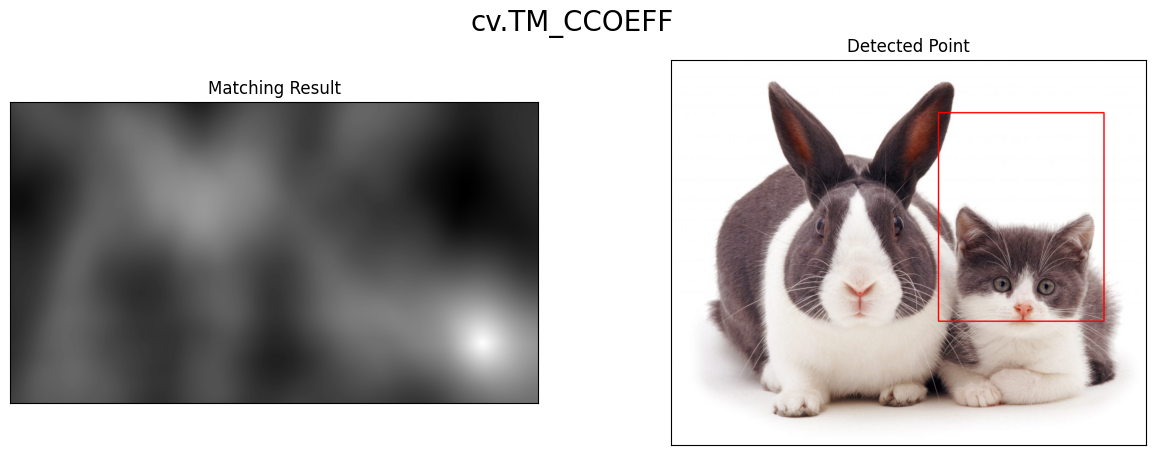

In [3]:
# TM_CCOEFF
template_matching(image.copy(), template.copy(), cv.TM_CCOEFF,"cv.TM_CCOEFF")

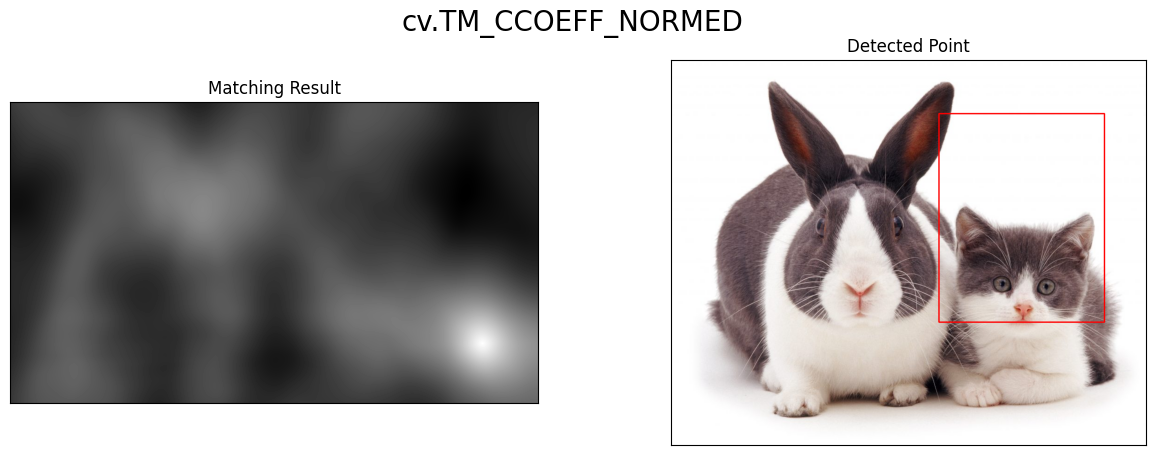

In [4]:
# TM_CCOEFF_NORMED
template_matching(image.copy(), template.copy(), cv.TM_CCOEFF_NORMED,"cv.TM_CCOEFF_NORMED")

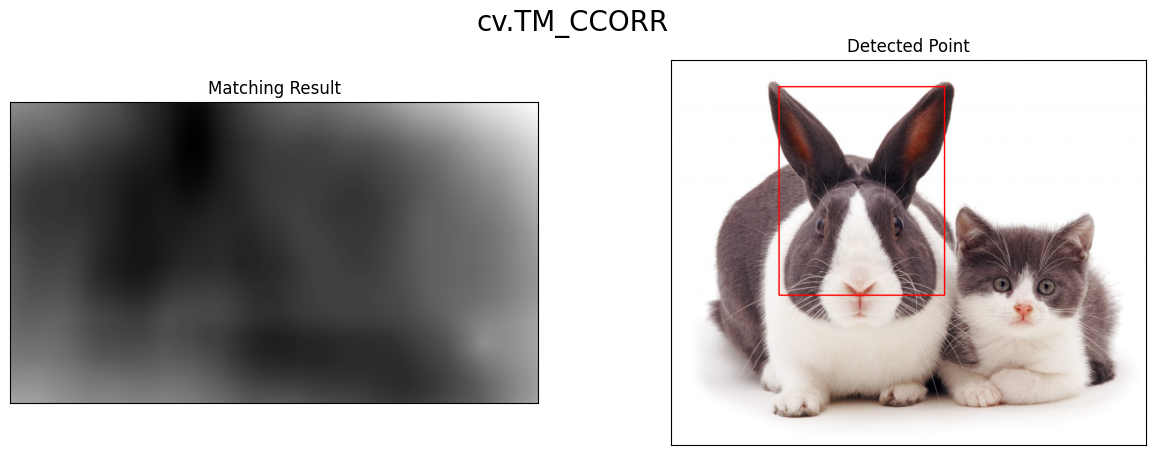

In [5]:
# TM_CCORR
template_matching(image.copy(), template.copy(), cv.TM_CCORR,"cv.TM_CCORR")

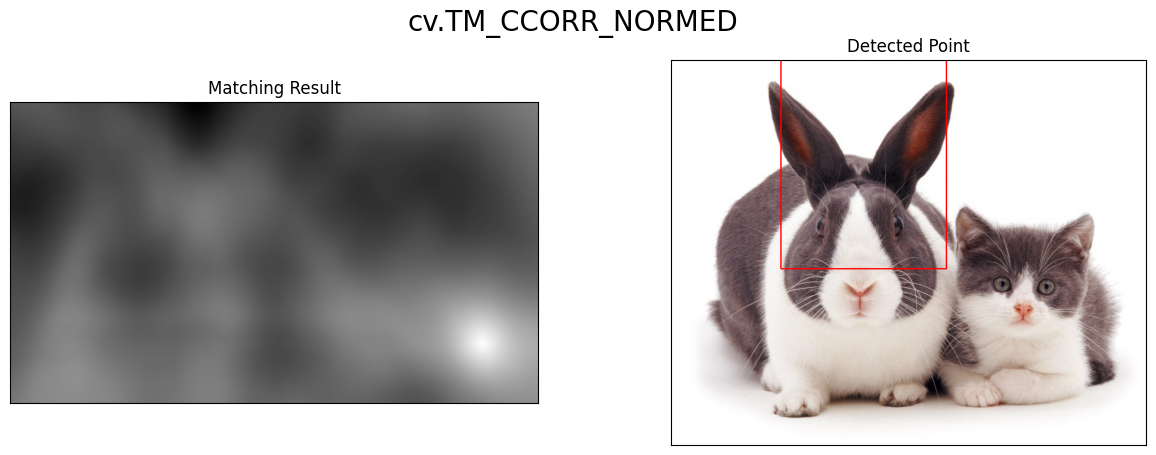

In [6]:
# TM_CCORR_NORMED
template_matching(image.copy(), template.copy(), cv.TM_CCORR_NORMED,"cv.TM_CCORR_NORMED")

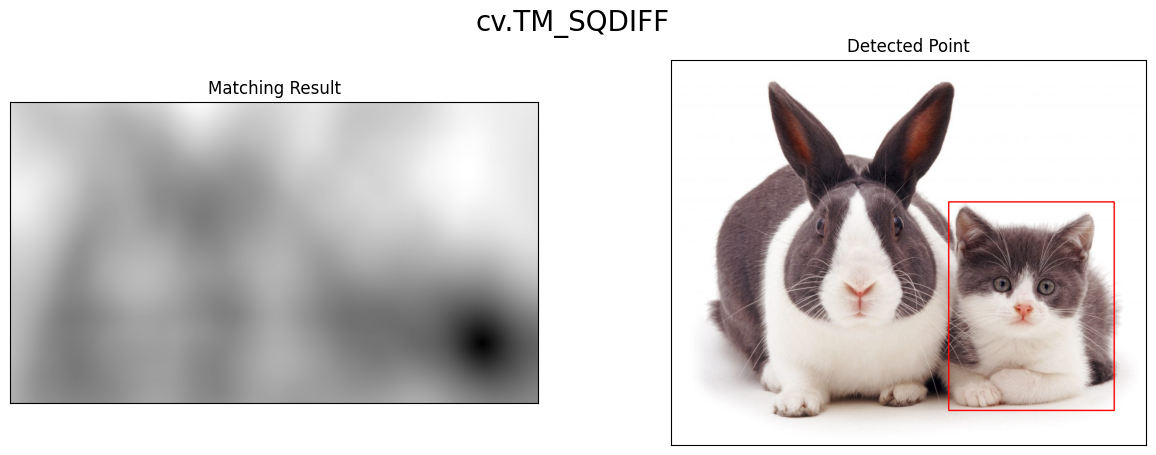

In [7]:
# TM_SQDIFF
template_matching(image.copy(), template.copy(), cv.TM_SQDIFF,"cv.TM_SQDIFF")

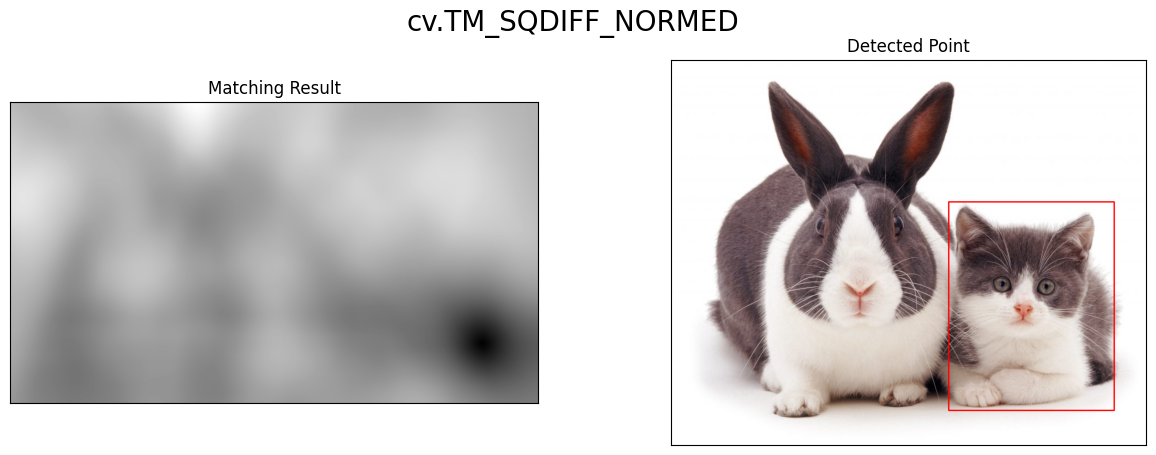

In [8]:
# TM_SQDIFF_NORMED
template_matching(image.copy(), template.copy(), cv.TM_SQDIFF_NORMED,"cv.TM_SQDIFF_NORMED")

### Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template

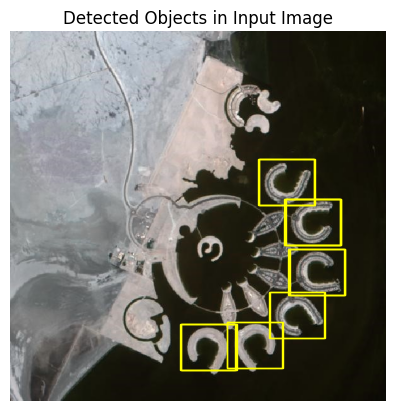

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,transform
import cv2 as cv  # Pastikan Anda mengimpor cv2 sebagai cv

# Baca gambar input dan template
input_image = cv.imread(path + 'Object Detection/bahrain.jpg')
template_image = cv.imread(path + 'Object Detection/bahrain-template.jpg')

def template_matching(input_image, template_images, initial_threshold=350000, max_threshold=7000000, threshold_increment=50000):
    matched_locations = []

    # Konversi gambar input menjadi grayscale
    input_image_gray = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

    for template_image in template_images:
        # Konversi template menjadi grayscale
        template_image_gray = cv.cvtColor(template_image, cv.COLOR_BGR2GRAY)

        # Dimensi template
        template_height, template_width = template_image_gray.shape

        # Mulai dengan threshold awal
        threshold = initial_threshold
        found_match = False

        while not found_match and threshold <= max_threshold:
            current_loop = 0
            for i in range(input_image_gray.shape[0] - template_height):
                for j in range(input_image_gray.shape[1] - template_width):
                    # Ambil subregion yang ukurannya sama dengan template
                    subregion = input_image_gray[i:i + template_height, j:j + template_width]

                    # Hitung SSD antara template dan subregion
                    ssd = np.sum((subregion - template_image_gray) ** 2)

                    if ssd < threshold:
                        current_loop += 1
                        # Jika match, simpan posisi koordinat
                        matched_locations.append((i, j))

                        # Setel flag bahwa ada match ditemukan
                        found_match = True

                        # Berhenti jika sudah mencapai jumlah yang cukup
                        if current_loop >= 5:
                            break
                if found_match:
                    break

            # Jika tidak ada match yang cukup, naikkan threshold
            if not found_match:
                threshold += threshold_increment

    return matched_locations

def rotate_image(image, angle):
  height, width = image.shape[:2]
  rotation_matrix = cv.getRotationMatrix2D((width / 2, height / 2), angle, 1)
  rotated_image = cv.warpAffine(image, rotation_matrix, (width, height))  # Tambahkan warpAffine untuk rotasi
  return rotated_image  # Pastikan untuk mengembalikan gambar yang dirotasi


augmented_templates = [
    template_image,
    np.fliplr(rotate_image(template_image, 110)),
    rotate_image(template_image, 300),
    np.fliplr(rotate_image(template_image, 160)),
    rotate_image(template_image,240),
    np.fliplr(rotate_image(template_image,230)),
]

matched_locations = template_matching(input_image, augmented_templates)

# Visualisasi hasil
fig, ax = plt.subplots()
ax.imshow(input_image, cmap='gray')

# Dapatkan template_width dan template_height dari template asli
template_height, template_width, _ = template_image.shape

for (i, j) in matched_locations:
    # Gambar kotak di sekitar lokasi yang terdeteksi
    rect = plt.Rectangle((j, i), template_width, template_height, edgecolor='yellow', facecolor='none', linewidth=1)
    ax.add_patch(rect)

plt.title("Detected Objects in Input Image")
plt.axis("off")
plt.show()

### Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

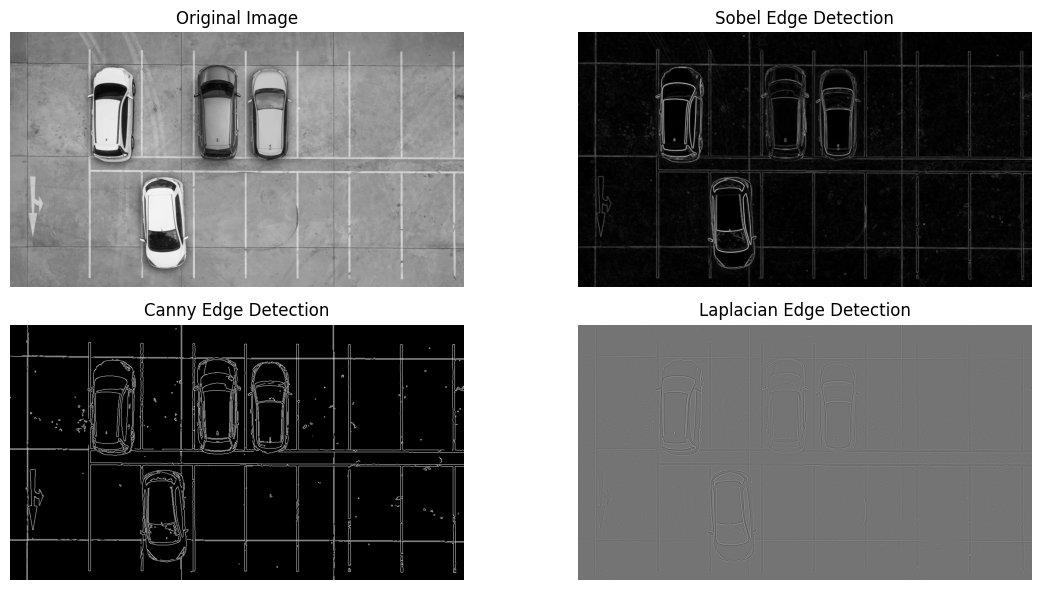

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread(path + 'Object Detection/car-park.jpg', cv.IMREAD_GRAYSCALE)

# Sobel Edge Detection
sobel_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)  # Deteksi tepi pada arah x
sobel_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)  # Deteksi tepi pada arah y
sobel_combined = cv.magnitude(sobel_x, sobel_y)       # Kombinasi magnitudo hasil Sobel x dan y

# Canny Edge Detection
canny_edges = cv.Canny(image, 100, 200)

# Laplacian Edge Detection
laplacian = cv.Laplacian(image, cv.CV_64F)

# Visualisasi hasil
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

### Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg

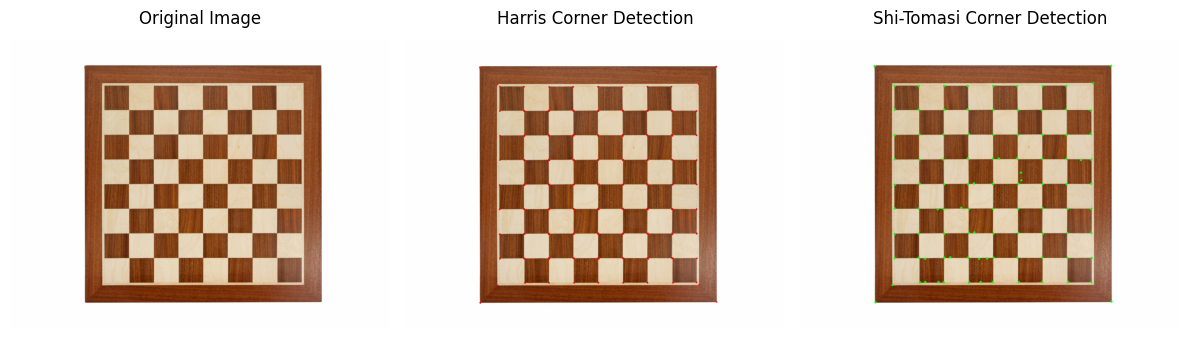

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
image = cv.imread(path + 'Object Detection/chess-board.jpg')

# Konversi gambar ke grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Harris Corner Detection
gray_harris = np.float32(gray_image)
harris_corners = cv.cornerHarris(gray_harris, blockSize=2, ksize=3, k=0.04)
harris_corners = cv.dilate(harris_corners, None)  # Dilation untuk memperjelas titik sudut
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]  # Tampilkan sudut dengan warna merah

# Shi-Tomasi Corner Detection (Good Features to Track)
shi_tomasi_corners = cv.goodFeaturesToTrack(gray_image, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi_tomasi_corners = np.intp(shi_tomasi_corners)
image_shi_tomasi = image.copy()
for i in shi_tomasi_corners:
    x, y = i.ravel()
    cv.circle(image_shi_tomasi, (x, y), 3, (0, 255, 0), -1)  # Tampilkan sudut dengan warna hijau

# Visualisasi hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(image_harris, cv.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(image_shi_tomasi, cv.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corner Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

### Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg

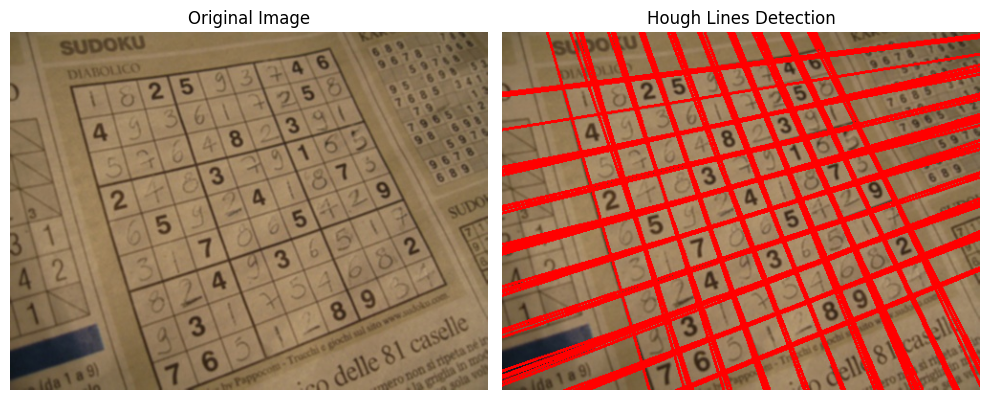

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
image = cv.imread(path + 'Object Detection/sudoku.jpg')

# Konversi gambar ke grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Deteksi tepi
edges = cv.Canny(gray, threshold1=100, threshold2=140)

# Hough Line Transform
lines = cv.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=140)

# Gambar garis yang terdeteksi pada gambar asli
image_with_lines = image.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Garis berwarna merah

# Visualisasi hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(image_with_lines, cv.COLOR_BGR2RGB))
plt.title("Hough Lines Detection")
plt.axis("off")

plt.tight_layout()
plt.show()